

#**Sentiment Analysis**

## **1.Import necessary libraries**

In [ ]:
# Сангуудыг ачаалах
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk  # (NLP) зориулалтын сан
from sklearn.feature_extraction.text import CountVectorizer  # Текстийг тоон төлөөлөл болгон хувиргах (Bag of Words ашиглан)
from sklearn.feature_extraction.text import TfidfVectorizer  # Текстээс TF-IDF-г тооцох
from sklearn.preprocessing import LabelBinarizer  # Шошго (labels)-ийг бинар хэлбэрт хөрвүүлэх
from nltk.corpus import stopwords  # Текстийн анализад ихэвчлэн орхигддог нийтлэг үгсийн жагсаалт
from nltk.stem.porter import PorterStemmer  # Porter алгоритмаар үндэс (stem) гаргах
from wordcloud import WordCloud, STOPWORDS  # Текстээс үгийн үүл (word cloud) гаргах
from nltk.stem import WordNetLemmatizer  # WordNet ашиглан үгийн үндэс (lemmatization)
from nltk.tokenize import word_tokenize, sent_tokenize  # Үг болон өгүүлбэрээр салгах токенизаци
from bs4 import BeautifulSoup  # HTML, XML задлах (web scraping)
import spacy  # Хурдан, үр дүнтэй NLP сан
import re, string, unicodedata  # Текст боловсруулах, хэвшмэл бус тэмдэгтүүдийг цэгцлэх
from nltk.tokenize.toktok import ToktokTokenizer  # Илүү үр дүнтэй токенизатор
from nltk.stem import LancasterStemmer, WordNetLemmatizer  # Үгийн үндэс гаргах альтернатив аргууд
from sklearn.linear_model import LogisticRegression, SGDClassifier  # Logistic regression ба SGD ангилагч
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes ангилагч
from sklearn.svm import SVC  # Support Vector ангилагч
from textblob import TextBlob  # Текст болон сэтгэл хөдлөлийн анализ
from textblob import Word  # Үгийн боловсруулалт
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Модель үнэлгээ хийх
import time  # Кодын гүйцэтгэлийн хугацааг хэмжих

import warnings
warnings.filterwarnings('ignore')  # Анхааруулгыг харуулахгүй байх

# График дүрслэлд стиль тохируулах
sns.set(style='whitegrid')


numpy: Массив боловсруулах, тоон математик үйлдлүүд хийхэд ашиглагддаг сан. Өгөгдөл боловсруулах болон тоон анализад өргөн хэрэглэгддэг.

pandas: Өгөгдлийг зохицуулах, анализ хийхэд ашиглагддаг сан. DataFrame зэрэг хүчирхэг өгөгдлийн бүтэцтэй бөгөөд хүснэгтэн өгөгдлийг удирдах боломжийг олгодог.

seaborn: Matplotlib дээр суурилсан өгөгдлийн визуализацийн сан. Статистик графикыг ойлгомжтой, үзэмжтэй гаргах зориулалттай.

matplotlib.pyplot: 2D өгөгдлийн визуализац хийх сан, төрөл бүрийн график, диаграммыг үүсгэх боломжтой.

nltk (Natural Language Toolkit): Байгалийн хэл боловсруулах (NLP) зориулалтын сан. Текстийг токенизаци хийх, үндэс гаргах (stemming), бусад текст боловсруулах үйлдлийг гүйцэтгэхэд ашиглагддаг.

sklearn.feature_extraction.text.CountVectorizer: Текст цуглуулгыг үгийн тоогоор шинж чанарын матриц болгон хөрвүүлэх (Bag of Words арга ашиглан).

sklearn.feature_extraction.text.TfidfVectorizer: Текст цуглуулгыг Term Frequency-Inverse Document Frequency (TF-IDF) арга ашиглан шинж чанарын матриц болгон хөрвүүлдэг. Энэ нь тухайн үгийн баримт бичгийн доторхи ач холбогдлыг бүх корпусад харьцуулан тооцдог.

sklearn.preprocessing.LabelBinarizer: Ангиллын шошгуудыг бинар хэлбэрт хөрвүүлэх (one-hot encoding) машин сургалтын моделд ашиглахад зориулагдсан.

nltk.corpus.stopwords: Текстийн анализад ихэвчлэн үл тоомсорлогддог нийтлэг үгсийн жагсаалт (stopwords) олон хэлэнд.

nltk.stem.porter.PorterStemmer: Үгийг үндсэн хэлбэрт (stem) оруулах Porter алгоритмыг ашигладаг.

wordcloud: Текстээс үгийн үүл (word cloud) визуализац үүсгэх сан, үгийн давтамжийг харуулдаг.

nltk.stem.WordNetLemmatizer: Лемматизаци хийхэд ашиглагддаг. Үгийн үндсэн хэлбэрийг контекстийг харгалзан бууруулдаг.

nltk.tokenize.word_tokenize, nltk.tokenize.sent_tokenize: Текстийг үг эсвэл өгүүлбэрээр хуваах (токенизаци хийх) зориулалттай.

bs4 (BeautifulSoup): HTML болон XML-г задлах, өгөгдөл гаргаж авахад ашиглагддаг, вэб скрапингад маш хэрэгтэй.

spacy: Хурдан, үр дүнтэй NLP сан. Токенизаци, нэршил таних (NER), өгүүлбэрийн синтакс анализ зэрэг функцтэй.

re, string, unicodedata: Текст боловсруулах, хэвшмэл бус тэмдэгтүүдийг цэгцлэх, регуляр илэрхийлэл ашиглахад хэрэглэгддэг.

nltk.tokenize.toktok.ToktokTokenizer: Текстийг хурдан, үр дүнтэй токенизаци хийх зориулалтын токенизатор.

nltk.stem.LancasterStemmer: Lancaster алгоритмыг ашиглан үндэс гаргах (Porter Stemmer-ээс илүү хатуу арга).

sklearn.linear_model.LogisticRegression, SGDClassifier: Оролтын шинж чанарын үндсэн дээр ангиллыг таамаглах зориулалтын классификаторууд.

sklearn.naive_bayes.MultinomialNB: Naive Bayes ангилагч, текст зэрэг тоон өгөгдөлд тохиромжтой.

sklearn.svm.SVC: Support Vector Classification (SVC) модель, шинж чанарын орон зайд гиперплан ашиглан ангилах зориулалттай.

textblob: Байгалийн хэл боловсруулах сан, энгийн API-тай, текст анализ, сэтгэл хөдлөлийн анализ хийх боломжтой.

sklearn.metrics.classification_report, confusion_matrix, accuracy_score: Моделийн ангилалтын гүйцэтгэлийг үнэлэх, precision, recall, F1-score зэрэг метрикүүдийг гаргах.

warnings: Код доторх анхааруулгыг удирдах, харуулах, шаардлагагүй анхааруулгыг дарж тохируулахад хэрэглэгддэг.

## **2. Load Data**

In [ ]:
#importing the training data
imdb_data = pd.read_csv('https://raw.githubusercontent.com/LawrenceDuan/IMDb-Review-Analysis/master/IMDb_Reviews.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,My family and I normally do not watch local mo...,1
1,"Believe it or not, this was at one time the wo...",0
2,"After some internet surfing, I found the ""Home...",0
3,One of the most unheralded great works of anim...,1
4,"It was the Sixties, and anyone with long hair ...",0
5,"For my humanities quarter project for school, ...",1
6,Arguebly Al Pacino's best role. He plays Tony ...,1
7,Being a big fan of Stanley Kubrick's Clockwork...,1
8,I reached the end of this and I was almost sho...,1
9,There is no doubt that Halloween is by far one...,1


In [ ]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


## **3. Exploratory Data Analysis (EDA) & Pre-Processing**

### **3.1. Null & Duplicate Values checked**

In [ ]:
# Check for null values in the dataset
null_values = imdb_data.isnull().sum()
print("\nNull values in each column:\n", null_values)

# Check for duplicate rows in the dataset
duplicate_rows = imdb_data.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)



Null values in each column:
 review       0
sentiment    0
dtype: int64

Number of duplicate rows: 418


**Тайлбар**
Энэ хувилбар нь хэд хэдэн давтамжтай туршилтын үр дүн юм. Давхардсан мөрүүдийг устгахгүй байх нь моделиин гүйцэтгэлд эерэг нөлөө үзүүлж болно. Учир нь давтагдсан өгөгдөл нь моделиин өмнө нь олж авсан хэв загварыг ойлгоход нэмэлт мэдээлэл өгч, сургалтын чанарыг сайжруулдаг. Мөн давхардсан мөрүүд нь холбогдох нөхцөл, утгын ялгааг тусгаснаар моделиийг илүү бат бөх, уян хатан болгоход тусалдаг. Та энэ аргыг бие даан туршиж, хэд хэдэн удаа давтан туршиж үр дүнг ажиглаж болно.

### **3.2. Features Engineering**

#### **3.2.1. review_length**

In [ ]:
# Calculate the length of the reviews and store it in a new column
imdb_data['review_length'] = imdb_data['review'].apply(lambda x: len(x.split()))

imdb_data.head(5)

,review,sentiment,review_length
0,My family and I normally do not watch local mo...,1,133
1,"Believe it or not, this was at one time the wo...",0,53
2,"After some internet surfing, I found the ""Home...",0,866
3,One of the most unheralded great works of anim...,1,66
4,"It was the Sixties, and anyone with long hair ...",0,601


#### **3.2.2. review_length Binned**

In [ ]:
# View unique values in the 'review_length' column
unique_lengths = imdb_data['review_length'].unique()
print("Unique Review Lengths:")
print(unique_lengths)

Unique Review Lengths:
[ 133   53  866 ... 1522   15 1277]


In [ ]:
# Defining binning boundaries
bins = [0, 100, 500, 1000, 1500, float('inf')]
labels = ['Short', 'Medium', 'Long', 'Very Long', 'Extreme']

# Creating a new column based on binning
imdb_data['review_length_binned'] = pd.cut(imdb_data['review_length'], bins=bins, labels=labels, right=True)

# Displaying top data to view the new column
print(imdb_data[['review_length', 'review_length_binned']].head(5))


   review_length review_length_binned
0            133               Medium
1             53                Short
2            866                 Long
3             66                Short
4            601                 Long


### **3.3. Check Class Distribution**


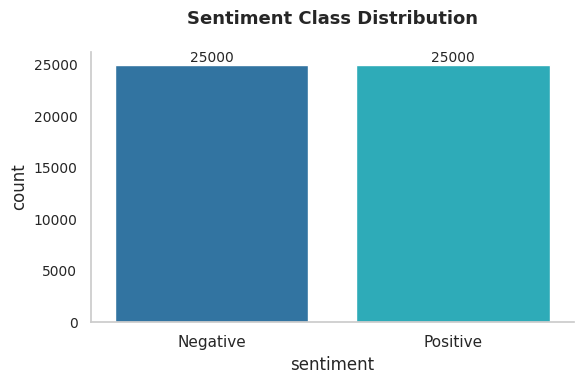

In [ ]:
# Create count plot
plt.figure(figsize=(6, 4))  # Set figure size
ax = sns.countplot(x='sentiment', data=imdb_data, palette=['#1f77b4', '#17becf'])

# Add title
plt.title('Sentiment Class Distribution', fontsize=13, weight='bold', ha='center', pad=20)

# Add counts above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Remove gridlines and figure border
plt.grid(False)
sns.despine()  # Remove figure border lines

# Set x-axis labels
ax.set_xticklabels(['Negative', 'Positive'], ha='center')

# Adjust y-axis settings
ax.tick_params(axis='y', labelsize=10)

# Display plot
plt.tight_layout()
plt.show()


Эерэг болон сөрөг ангилалууд тэнцвэртэй байна. Энэ нь сургалтын явцад моделиин аль нэг талд давуу эрх олгохгүй, зөв ба тэнцвэртэй сургалтын боломжийг бүрдүүлдэг.

### **3.4. Check Review Length Distribution**


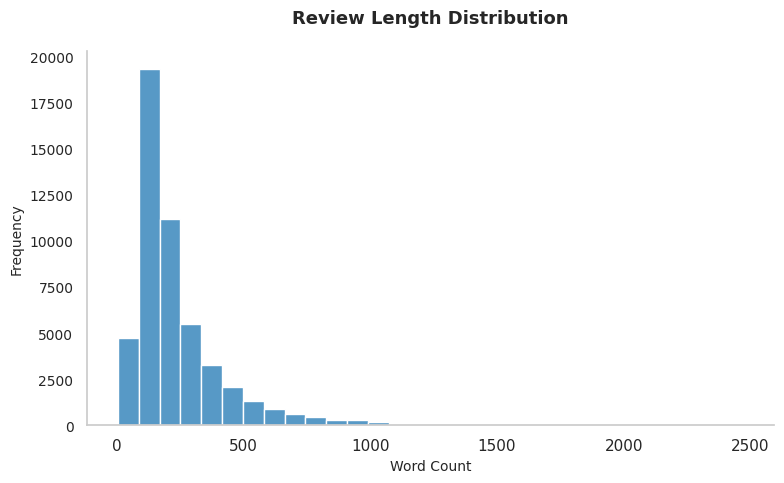

In [ ]:
# Set style
sns.set(style='whitegrid')

# Add review length column
imdb_data['review_length'] = imdb_data['review'].apply(lambda x: len(x.split()))

# Create review length distribution plot
plt.figure(figsize=(8, 5))  # Set figure size
ax = sns.histplot(imdb_data['review_length'], bins=30, color='#1f77b4')  # Using blue color

# Add title with padding
plt.title('Review Length Distribution', fontsize=13, weight='bold', ha='center', pad=20)  # Add padding

# Remove gridlines and figure border
plt.grid(False)
sns.despine()  # Remove figure border lines

# Add axis labels
plt.xlabel('Word Count', fontsize=10)  # x-axis label
plt.ylabel('Frequency', fontsize=10)  # y-axis label

# Adjust the size of y-axis tick labels
ax.tick_params(axis='y', labelsize=10)  # Set size of y-axis labels

# Display plot
plt.tight_layout()
plt.show()


### **3.4. Correlation between Review Length and Sentiment**


In [ ]:
# Create a contingency DataFrame to count the frequency of review length categories and sentiment
contingency_table = pd.crosstab(imdb_data['review_length_binned'], imdb_data['sentiment'])

# Calculate percentages
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Display the percentage table
print(contingency_table_percentage)


sentiment                     0          1
review_length_binned                      
Short                 45.597125  54.402875
Medium                51.065639  48.934361
Long                  46.113583  53.886417
Very Long             45.070423  54.929577
Extreme                9.090909  90.909091


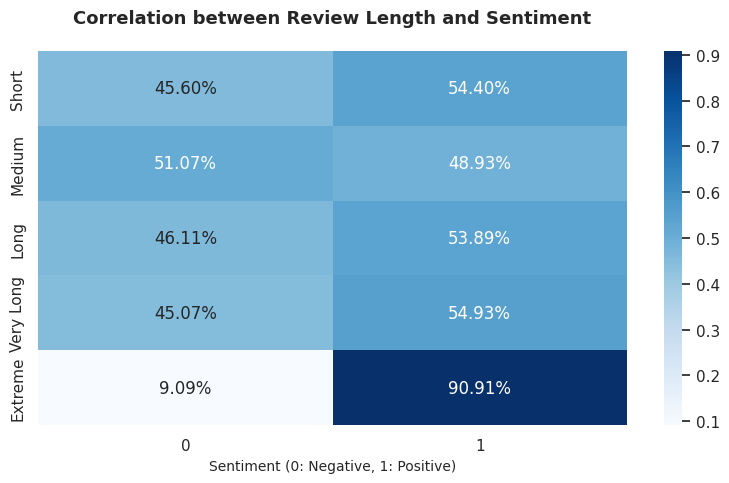

In [ ]:
# Create a contingency DataFrame to count the frequency of review length categories and sentiment
contingency_table = pd.crosstab(imdb_data['review_length_binned'], imdb_data['sentiment'])

# Calculate percentages
contingency_table_percentage = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Create a heatmap plot
plt.figure(figsize=(8, 5))  # Set the figure size
ax = sns.heatmap(contingency_table_percentage, annot=True, fmt=".2%", cmap='Blues', cbar=True)

# Add a title
plt.title('Correlation between Review Length and Sentiment', fontsize=13, weight='bold', ha='center', pad=20)

# Set axis labels
ax.set_xlabel('Sentiment (0: Negative, 1: Positive)', fontsize=10)
ax.set_ylabel('')

# Display the plot
plt.tight_layout()
plt.show()


**Тайлбар**

Эерэг сэтгэл давамгайлж байна: Ерөнхийдөө тойм урт байх тусам эерэг үнэлгээ өгөх магадлал өндөр байдаг, ялангуяа маш урт буюу онцгой тоймуудад.

Богино тоймууд нь бага мэдээлэлтэй: Богино тоймууд ихэвчлэн эерэг байдаг ч, урт болон онцгой тоймуудтай харьцуулахад эзлэх хувь нь бага. Энэ нь богино тоймууд нь мэдээллийн хувьд дутмаг байж болохыг илтгэнэ.

Тоймын урт ба сэтгэл хандлагын холбоо: Тоймын урт нь өгөх сэтгэл хандлагатай эерэг хамааралтай харагдаж байна. Хэрэглэгчид урт тоймуудад өөрийн эерэг сэтгэгдлийг илүү тод илэрхийлэх боломжтой гэж үзэж болно.

In [ ]:
from scipy import stats

# Separating review lengths based on sentiment
length_positive = imdb_data[imdb_data['sentiment'] == 1]['review_length']
length_negative = imdb_data[imdb_data['sentiment'] == 0]['review_length']

# Calculating the average review length for each category
mean_positive = length_positive.mean()
mean_negative = length_negative.mean()

# Performing t-test
t_stat, p_value = stats.ttest_ind(length_positive, length_negative)

# Displaying results
print("Average review length (Positive):", mean_positive)
print("Average review length (Negative):", mean_negative)
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Determining significance
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is a significant difference between the lengths of positive and negative reviews.")
else:
    print("Fail to reject H0: There is no significant difference between the lengths of positive and negative reviews.")


Average review length (Positive): 232.84932
Average review length (Negative): 229.46456
T-statistic: 2.208670012690372
P-value: 0.027202120447486624
Reject H0: There is a significant difference between the lengths of positive and negative reviews.


In [ ]:
def cohen_d(x, y):
    # Calculate Cohen's d
    nx = len(x)
    ny = len(y)
    mean_diff = x.mean() - y.mean()
    pooled_std = (((nx - 1) * x.std() ** 2 + (ny - 1) * y.std() ** 2) / (nx + ny - 2)) ** 0.5
    return mean_diff / pooled_std

# Calculate Cohen's d
effect_size = cohen_d(length_positive, length_negative)
print("Cohen's d:", effect_size)  # Display Cohen's d value


Cohen's d: 0.01975494515296399


Тайлбар

Статистикийн ач холбогдол: Эерэг болон сөрөг сэтгэлтэй тоймуудын уртын хооронд статистикийн хувьд мэдэгдэхүйц ялгаа байна. Өөрөөр хэлбэл, тоймын урт нь сэтгэл хандлагатай холбоотой хүчин зүйлүүдийн нэг гэж үзэж болно.

Эффектын хэмжээ: Гэвч Cohen-ийн d утга маш бага байгаа тул илэрсэн дундаж ялгаа практик хувьд том нөлөө үзүүлэхүйц биш байж болзошгүйг харуулж байна. Модел хөгжүүлэх явцад сэтгэл хандлагыг илүү сайн урьдчилан таамаглах хүчтэй бусад шинж чанарууд байж болно. Жишээлбэл, эерэг болон сөрөг үгс нь илүү их нөлөө үзүүлж болох бөгөөд энэ нь модел бүтээсний дараа дэлгэрэнгүй тайлбарлагдана.

###**3.5. Text normalization**

In [ ]:
import nltk
nltk.download('stopwords')

#Tokenization of text
tokenizer = ToktokTokenizer()

#Setting English stopwords
stopword_list = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Тайлбар

NLTK-г импортлох ба Stopwords татаж авах: Энэ код нь Natural Language Toolkit (NLTK) номын санг ашиглан байгалийн хэлний боловсруулалтын (NLP) үйлдлүүдийг гүйцэтгэхэд хэрэглэгддэг. Дараа нь англи хэлний stopwords буюу нийтлэг үгсийн жагсаалтыг татаж авна. Эдгээр нь “and”, “that”, “is” гэх мэт текстэд утга агуулга бага үгс бөгөөд боловсруулалтын явцад ихэвчлэн устгадаг.

Текстыг токенчлох: ToktokTokenizer нэртэй токенер үүсгэж байна. Токенчлол гэдэг нь текстийг жижиг хэсгүүдэд, жишээ нь үгс, өгүүлбэрүүдэд хуваах үйл явц бөгөөд анализ хийхэд хялбар болгодог.

Англи хэлний Stopwords-ийг тодорхойлох: Энэ код нь NLTK ашиглан англи хэлний нийтлэг үгсийн жагсаалтыг тохируулж, текстийг анализлах явцад эдгээр үгсийг үл тоомсорлох боломжийг олгодог.

### **3.6. Removing html strips and noise text**

In [ ]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)

### **3.7.Removing special characters**

In [ ]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

### **3.8. Text stemming**

In [ ]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

### **3.9. Removing stopwords**

In [ ]:
#set stopwords to english
# stop=set(stopwords.words('english'))
# print(stop)

#removing the stopwords
# def remove_stopwords(text, is_lower_case=False):
   # tokens = tokenizer.tokenize(text)
   # tokens = [token.strip() for token in tokens]
   # if is_lower_case:
      #  filtered_tokens = [token for token in tokens if token not in stopword_list]
    # else:
      #  filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    # filtered_text = ' '.join(filtered_tokens)
    # return filtered_text

#Apply function on review column
# imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

### **3.9. Removed Features**

In [ ]:
# Dropping the 'review_length' and 'review_length_binned' columns
imdb_data = imdb_data.drop(['review_length', 'review_length_binned'], axis=1)

# Displaying the top few rows to verify
print(imdb_data.head())


                                              review  sentiment
0  my famili and i normal do not watch local movi...          1
1  believ it or not thi wa at one time the worst ...          0
2  after some internet surf i found the homefront...          0
3  one of the most unherald great work of anim th...          1
4  it wa the sixti and anyon with long hair and a...          0


### **3.9. Review Data Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Taking 70% of the data for training
train_size = int(0.7 * len(imdb_data))

# Splitting data into training and testing sets
norm_train_reviews = imdb_data.review[:train_size]
norm_test_reviews = imdb_data.review[train_size:]
train_sentiments = imdb_data.sentiment[:train_size]
test_sentiments = imdb_data.sentiment[train_size:]

# Combining into X_train, X_test, y_train, y_test
X_train = norm_train_reviews
X_test = norm_test_reviews
y_train = train_sentiments
y_test = test_sentiments

# Example print to check results
print(f"First training review:\n{X_train.iloc[0]}\n")
print(f"First testing review:\n{X_test.iloc[0]}\n")
print("Train Sentiments Shape:", y_train.shape)
print("Test Sentiments Shape:", y_test.shape)


First training review:
my famili and i normal do not watch local movi for the simpl reason that they are poorli made they lack the depth and just not worth our timeth trailer of nasaan ka man caught my attent my daughter in law and daughter so we took time out to watch it thi afternoon the movi exceed our expect the cinematographi wa veri good the stori beauti and the act awesom jericho rosal wa realli veri good so claudin barretto the fact that i despis diether ocampo prove he wa effect at hi role i have never been thi touch move and affect by a local movi befor imagin a cynic like me dab my eye at the end of the movi congratul to star cinema way to go jericho and claudin

First testing review:
alright if you want to go see thi movi just give me our money illkick you were it count and youll have the same amount of fun illeven guarante more fun thi movi onc again show what happen whenyou cant get ani one els to hire your famili and your forc to makeyour own movi same im go through pube

Тайлбар

Энэ код нь imdb_data өгөгдлийн сан дахь сэтгэгдлүүдийг машин сургалтын загварт ашиглахад зориулан сургалтын өгөгдөл (70%) ба шалгалтын өгөгдөл (30%) болгон хуваадаг. Алхамууд нь дараах байдалтай:

Өгөгдлийн 70%-ийг сургалтанд авах: Нийт өгөгдлийн тооноос индекст суурилан хязгаар тогтоож, сургалтын өгөгдлийг тодорхойлно.

Сэтгэгдэл (review) ба сэтгэл хөдлөлийн (sentiment) багануудыг хуваах: review багана нь шинж чанар (X) болж, sentiment багана нь шошго (y) болж хуваагдана.

Хуваасан үр дүнг хадгалах: Хуваалтанд орсон өгөгдлүүдийг X_train, X_test, y_train, y_test хувьсагчдад хадгална.

Анхны хэдэн жишээг харах: Сургалтын ба шалгалтын өгөгдлийн эхний сэтгэгдлүүдийг харуулж, хуваалтын үр дүн зөв эсэхийг баталгаажуулна.